In [1]:
# conventional way to import pandas
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


In [3]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3','5'], axis=1,inplace=True)

In [4]:
#Drop all features except (Age - gender -Height -weight)
subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [5]:
subset.shape

(2772, 3)

In [6]:
#Missing da


In [7]:
import numpy as np

# Drop sample that has missing value in Gender feater 
_Data=subset.drop(subset.index[1319])

_Data.shape

(2771, 3)

In [8]:
#removing outliers
_Data = _Data[(_Data['1']> 0)]
_Data= _Data[(_Data['1']<100)]



In [9]:
_Data.shape

(2759, 3)

In [10]:
#Removing outliers from Weight
_Data = _Data[(_Data['4']> 38)]
_Data = _Data[(_Data['4']<250)]

In [11]:
_Data.shape

(2340, 3)

# Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [12]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

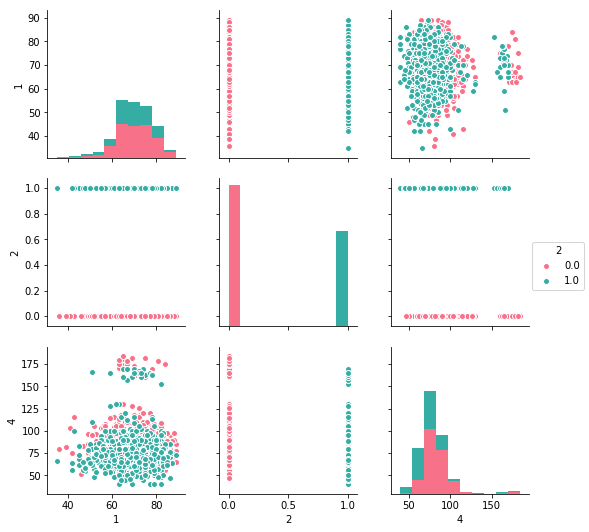

In [13]:
sns.pairplot(_Data,  hue="2",palette="husl")

In [14]:
# Female subset
F_Data=_Data[_Data['2'] == 0.0]
#Male subset
M_Data=_Data[_Data['2'] == 1.0]

In [15]:
BF_Data=F_Data.sample(943, random_state=0)

In [16]:
frames = [M_Data, BF_Data]

In [17]:
MF_Data = pd.concat(frames)

In [18]:
MF_Data= MF_Data[(MF_Data['1']> 0)]
MF_Data =MF_Data[(MF_Data['1']<100)]


In [21]:
#samples= 1864=1889-25
MF_Data=MF_Data.sample(1864, random_state=0)

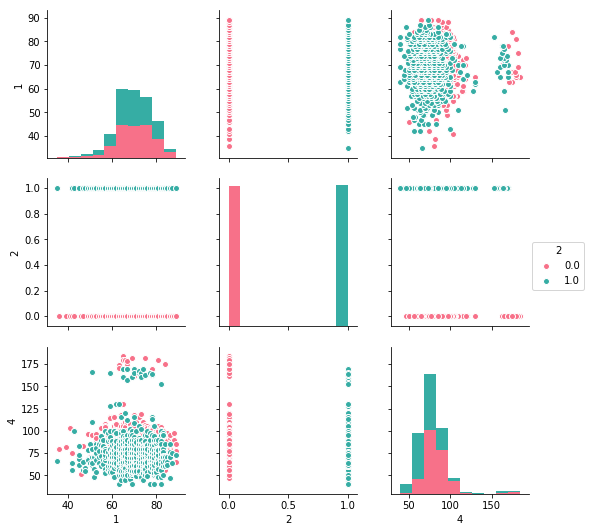

In [22]:
MF_Data=MF_Data.sort_values("1", ascending = 'True')
MF_Data
sns.pairplot(MF_Data,  hue="2",palette="husl")


# Task 7: Cross Validation CV

In [23]:
# select a Series from the DataFrame
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]
# print the first 5 values
y.shape


(1864,)

In [24]:
MF_Data

,1,2,4
1689,35,1.0,66.0
1550,36,0.0,80.0
2529,39,0.0,82.0
2496,41,0.0,103.0
404,42,1.0,64.0
285,42,0.0,75.0
579,42,1.0,64.0
2728,42,1.0,56.0
304,43,0.0,100.0
2377,43,1.0,100.0


In [25]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1864,)


# KNN ML Algorithm With Accuracy 79%

In [26]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#(scores)

In [27]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of K-NN classifier on test set:',scores.mean())


Accuracy of K-NN classifier on test set: 0.5386124074738875


In [28]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.4823389544452163, 0.5058855232669275, 0.532683960482822, 0.5332301889607394, 0.5386124074738875, 0.5493333457659834, 0.5338196675198572, 0.5536344831980505, 0.5601236582451004, 0.568659558299027, 0.5724403737876224, 0.5643902329101571, 0.5804964201738395, 0.5837050384868221, 0.5971286173183706, 0.5960417861366627, 0.5960705366397966, 0.5955185269796275, 0.5981922926894464, 0.6041033961337567, 0.6040976460331299, 0.6131943052246658, 0.6062424335669118, 0.6067771618435756, 0.6083958773332587, 0.6057105803405614, 0.6057019551896212, 0.6110552988731357, 0.609448145747956, 0.6110754242253293, 0.6169491520155657, 0.623389264717538, 0.6266179462194643, 0.6244587523524905, 0.6255138958175012, 0.6351654397195194, 0.6324858928274488, 0.6330379024876179, 0.6378478927435285, 0.6330407775379313, 0.6351971585178415, 0.6362637089392308, 0.6351740648704596, 0.6303698557968007, 0.6330494026888714, 0.6298437526710771, 0.6335986305436021, 0.6357577933289508, 0.6362868025866127]


Text(0,0.5,'Cross-Validated Accuracy')

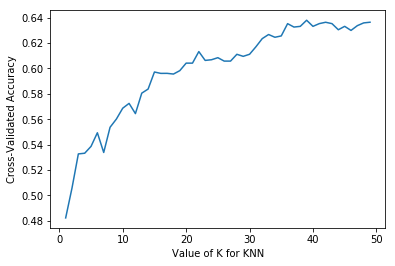

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [30]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=24)
y_pred_K = cross_val_predict(knn, X, y, cv=10)
conf_mat_KNN = confusion_matrix(y, y_pred_K)
print('Accuracy of KNN classifier on test set:',cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())


Accuracy of KNN classifier on test set: 0.6067771618435756


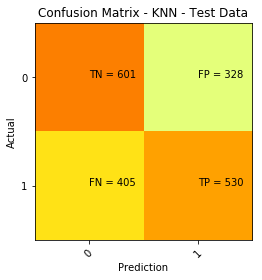

In [31]:
plt.clf()
plt.imshow(conf_mat_KNN, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - KNN - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_KNN[i][j]))
plt.show()

In [32]:
print(classification_report(y, y_pred_K))

             precision    recall  f1-score   support

        0.0       0.60      0.65      0.62       929
        1.0       0.62      0.57      0.59       935

avg / total       0.61      0.61      0.61      1864



#  Decision Tree with Accuracy 67%

In [33]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
y_pred_DT = cross_val_predict(DT, X, y, cv=10)
conf_mat_DT = confusion_matrix(y, y_pred_DT)
#print(scores)

In [34]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of Decision Tree classifier on test set:',scores.mean())

Accuracy of Decision Tree classifier on test set: 0.43662543689109157


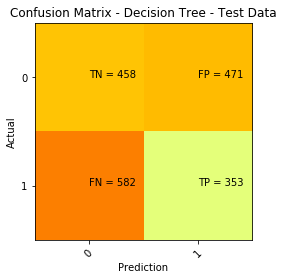

In [35]:
plt.clf()
plt.imshow(conf_mat_DT, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Decision Tree - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_DT[i][j]))
plt.show()

In [36]:
print(classification_report(y, y_pred_DT))

             precision    recall  f1-score   support

        0.0       0.44      0.49      0.47       929
        1.0       0.43      0.38      0.40       935

avg / total       0.43      0.44      0.43      1864



#  Logistic Regrassion with Accuracy 73%

In [37]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
y_pred_LR= cross_val_predict(logreg, X, y, cv=10)
conf_mat_LR= confusion_matrix(y, y_pred_LR)
#print(scores)


In [38]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of logistic regression classifier on test set:',scores.mean())

Accuracy of logistic regression classifier on test set: 0.6572432929738432


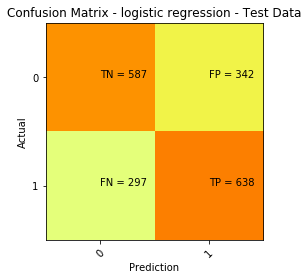

In [39]:
plt.clf()
plt.imshow(conf_mat_LR, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - logistic regression - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LR[i][j]))
plt.show()

In [40]:
print(classification_report(y, y_pred_LR))

             precision    recall  f1-score   support

        0.0       0.66      0.63      0.65       929
        1.0       0.65      0.68      0.67       935

avg / total       0.66      0.66      0.66      1864



#  Linear Discriminant Analysis with Accuracy 74%

In [41]:
#10-fold cross-validation with Discriminant Analysis
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
y_pred_LDA= cross_val_predict(lda, X, y, cv=10)
conf_mat_LDA= confusion_matrix(y, y_pred_LDA)
#print(scores)

In [42]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.6454467128850431


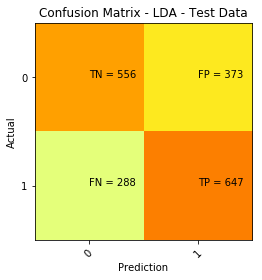

In [43]:
plt.clf()
plt.imshow(conf_mat_LDA, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - LDA - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [44]:
print(classification_report(y, y_pred_LDA))

             precision    recall  f1-score   support

        0.0       0.66      0.60      0.63       929
        1.0       0.63      0.69      0.66       935

avg / total       0.65      0.65      0.64      1864



In [45]:
from sklearn.svm import SVC  
SVM= SVC(kernel='linear') 
scoresw = cross_val_score(SVM, X, y, cv=10, scoring='accuracy')
y_pred_SVM= cross_val_predict(SVM, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_SVM)
#print(scores)
print('Accuracy of LDA classifier on test set:',scoresw.mean())

Accuracy of LDA classifier on test set: 0.6582867186662253


In [48]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(NN, X, y, cv=10, scoring='accuracy')
y_pred_NN= cross_val_predict(NN, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_NN)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.5016071686659922


In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
y_pred_clf= cross_val_predict(clf, X, y, cv=10)
conf_mat_clf= confusion_matrix(y, y_pred_clf)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.6195877954891238
